# Linear DATA

IF feature가 하나인 data의 경우 데이터의 식:   
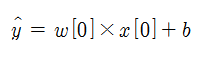

* w[0]은 기울기, b는 y절편
* feature이 많아지면 w는 각 특성에 해당하는 기울기를 띈다
* 예측값은 x에 w의 각 가중치를 곱해서 더한 가중치의 합으로 볼 수 있다


#  Least Sequres Method (LSM) - 최소제곱법

* 어떤 점들의 분포를 직석이나 곡선으로 근사하는 방식
* 예측과 훈련 data에 있는 targer y 사이의 **평균제곱오차(MSE)**를 최소화하는 파라미터 w와 b를 찾는다.
* 비선형식에 대해서는 풀수없다

>NOTE   
> **평균제곱오차(MSE)**
> * 추측값에 대한 정확성 측정 방법
> * 오차의 제곱에 대해 평균을 취함
> * 작을 수록 원본과의 오차가 적은 것이므로 추측한 값의 정확성이 높은 것
>* 미분에 편의함   
$MSE={\frac{1}{n}}\sum_{i=1}^N (\hat{Y_i}-Y_i)^2 $

parameter을 구하기 위해:   
1. 목표 - model과 data의 $residual^2$의 합 또는 평균을 최소화하도록 parameter 결정
    * residua(잔차)=loss: 
        + 회귀 분석에서 사용하는 용어로, 모델의 적합도(회귀직선)을 뜻함
        + 평균으로 중심으로 분포했는지 알아볼 수 있는 분산 및 표준편차의 역할
        + $e_i=(y_i-\hat{y_i})$   
        
        
2. $\sum_{i=1}^N {r_i}^2=\sum_{i=1}^N (f(x_i)-y_i)^2$ 식의 값을 최소화   

3. f(x)=ax+b인 경우
    * $\sum_{i=1}^N (ax_i+b-y_i)^2$

### **대수적 방법**

1. norm의 제곱식으로 표현
    * ${\begin{Vmatrix} f(x_1)-y_1 \\f(x_2)-y_2\\...\\f(x_n)-y_n\end{Vmatrix}}^2$

${\begin{Vmatrix} 
    {{\begin{bmatrix} x_1 & 1 \\ \vdots \\ x_n & 1}
    {\begin{bmatrix} a\\ b}
    -{\begin{bmatrix} y_1 \\ \vdots \\ y_n & 1}}
    \end{bmatrix}}^2$
    

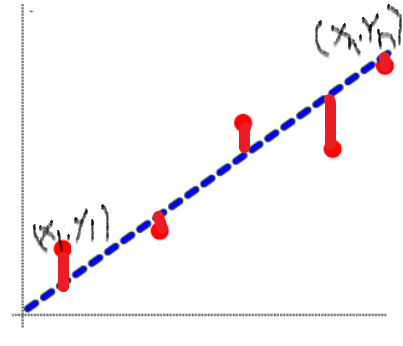

2. 행렬식으로 표현하면  
    - ${\begin{Vmatrix} {AX-y} \end{Vmatrix}}^2$
    - 따라서 AX가 y의 projection과 일치할 때 최소값을 가짐
        + $proj_{col(A)}y=AX$
        
> NOTE   
> A가 full column rank(각 원소가 모두 독립적인)라는 조건하에
> *  $projcol(A)y=A(A^{T}A)^{-1}A^{T}y$
> * 따라서 A가 가역행렬(inveteor를 곱해 단위 행렬이 될수 있는 행렬)이므로 proj y도 가역행렬이다

### **결과**
$AX-y=projcol(A)y-y$   
$A^{T}(AX-y)=A^{T}(projcol(A)y-y)=0$   
**$A^{T}AX=A^{T}y$** -> 정규방정식   
* 2by2 행렬로 전ㅎ환

$X=(A^{T}A)^{-1}A^{T}y$

### 최소제곱법의 한계
* 데이터 중에 보통 outlier(정상적인 데이터 분포에서 동떨어진 데이터)라고 불리는 이상한 놈이 하나라도 끼어 있으면 적용하기 힘들다
* 전체 데이터의 $residual^2$ 합을 최소화하기 위해 outlier의 residual도 같이 줄이려고 하다보면 전혀 엉뚱한(잘못된) 근사 결과를 낼 수 있기 때문
* 따라서, outlier가 존재하는 경우에는
    + 1. RANSAC, LMedS, M-estimator 등과 같은 robust한 파라미터 추정 방법을 사용
    + 2. outlier 제거

### 실전예제
1. 포물선 근사
    * 관측된 데이터 (x1, y1), ..., (xn, yn)를 포물선 f(x) = ax2 + bx + c로 근사시킬 수 있다.  
    * 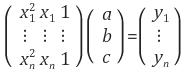
    * 포물선 이상의 3차, 4차, ... n차 함수로 근사할 경우에도 마찬가지이다. 이와 같이 식을 세운 후 matlab 등의 툴로 pseudo inverse 계산을 해 주면 바로 답을 얻을 수 있다.   

2. 영상밝기 보정

예를 들어, 문자인식에서 배경과 문자를 분리하기 위해 이미지를 이진화한다고 했을 때, 아래 그림과 같이 배경의 밝기 변화가 심한 경우에는 어떤 threshold 값을 사용해도 글씨와 배경이 잘 분리되지 않을 수 있다.   

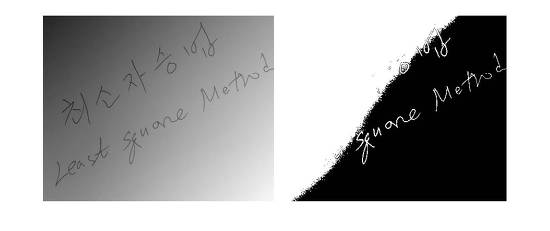

이럴 때, 배경의 밝기 변화를 근사하여 이를 제거한 후에 이진화를 수행하면 아래 그림과 같이 글씨와 배경을 깨끗하게 분리해 낼 수 있다.   
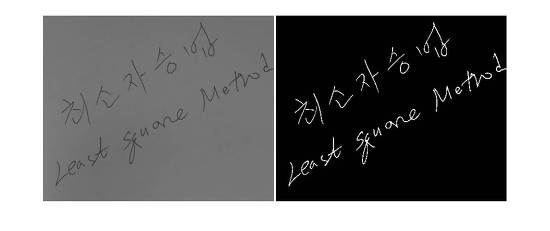

* 그러기 위해서는 먼저 배경의 밝기 변화를 곡면으로 근사할 수 있어야 한다. 이를 위해 영상의 픽셀값들을  관측값으로 생각하고 모델을 z = f(x, y)로 세운다. 여기서 (x, y)는 픽셀 좌표이고, z는 (x, y)에서의 입력 영상의 픽셀값(intensity), f는 우리가 픽셀값들을 근사하기 위한 어떤 함수 모델이다.
* 먼저, 영상 배경 밝기를 1차 평면 f(x, y) = ax + by + c로 근사할 경우에는 행렬식을 다음과 같이 세울 수 있다.   
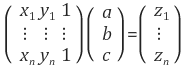

# **Gradient descent(경사하강법)**

### 최적화 이론
손실 함수를 최소로 하는 입력값(최적값)을 찾아내는 연구
#### 무차별 대입법
* 가능한 모든 수를 대입해보는 방법
* 다음과 같은 문제로 최적화에 이용할 수 없다.
    + x(최적값)가 존재하는 범위를 알아야 함
    + x를 정확히 찾기 위해 무한히 촘촘하게 조사해야함
    + f(x)의 계산 복잡도가 매우 높음

### 경사하강법
비용함수(cost function)를 최소화 하기위해 경사를 반복적으로 하강해가면서 파라미터를 조정해 나가는 것이다.
파라미터 벡터 세타에 대해 비용함수의 현재 gradient를 계산하고, 이를 감소하는 방향으로 0이 될때까지 하강한다. 이는 미분값(기울기)이 0이 되는 지점일 것이다.
* **경사는 기울기(Gradient)를 이용해 계산**   
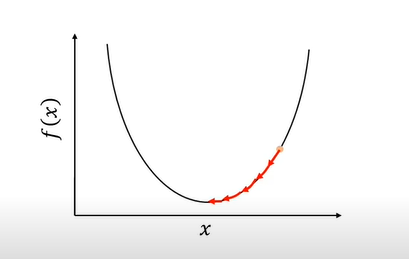



* 학습률 $\alpha$에 비례하여 이동한다   
    + $\alpha$가 작은 경우, 시간이 오래 걸리고 굴곡이 있는 함수의 경우 min값을 찾지 못할 수 도 있다
    + $\alpha$가 큰 경우, 최적점을 가로질러 반대 경사로 넘어갈 수 있어 최적값을 놓치기 쉬움   
    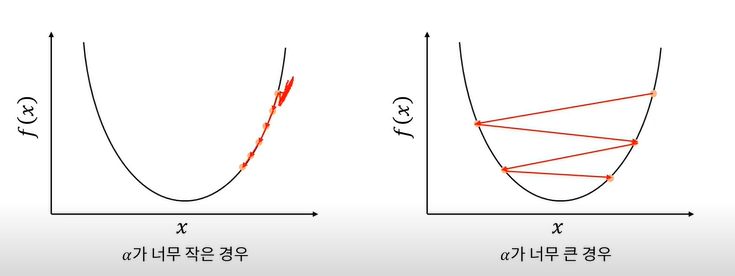

> NOTE
>
> 볼록함수(Convex fucntion)는 어디서 시작해도 무조건 최적값에 도달할 수 있다   
> 그러나 비 볼록함수의 경우 시작 위치에 따라 다른 최적값을 갖는다
> * $\alpha$가 커질 수 록 최적값을 찾기 어려워진다
> * 즉, **지역 최적값()**에 빠질 위험이 있다

## 1. 배치 경사 하강법(Batch Gradient Decent)

>**배치**는 단일 반복에서 기울기를 계산하는 데 사용하는 예의 총 개수
>* 배치가 너무 커지면 단일 반복으로도 계산하는 데 오랜 시간이 걸릴 수 있다.

* 경사하강법을 구현하려면 $θ_j$가 변함에 따라 비용함수가 변하는 정도를 계산해야 하는데, 이를 편도함수(partial derivative)라고 한다.
* 즉, 비용함수를 미분해서 미분값(기울기)의 변화를 관찰한다는 것이다.   
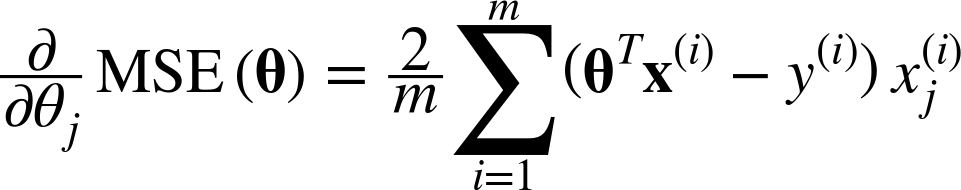
     + MSE를 $θ_j$에 관해 편미분

model parameter θ가 많아질 경우, 벡터화를 통해 일괄 계산할 수 있다   
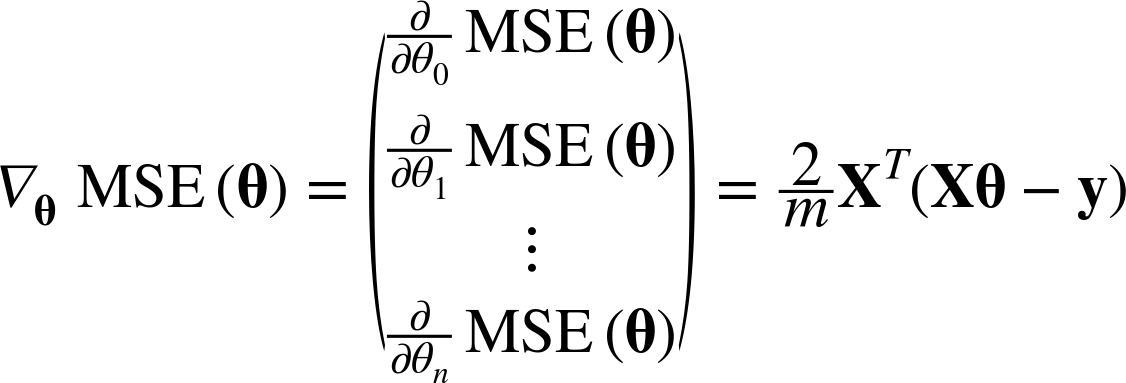

* gradient vector가 구해지면 다음 step으로 가기 위한 θ를 구해야 하는데, 여기서 $ \alpha$가 사용된다   
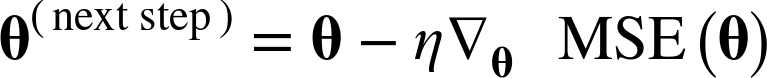

>NOTE
> θ에서 학습률을 곱한 gradient vector을 빼는 이유는:
> + step이 전역 최솟값의 좌측에서 시작한 경우 기울기는 음의 값을 가지므로 -와 만나 +가 되어 θ값을 키워 우측으로 이동해야하기 떄문

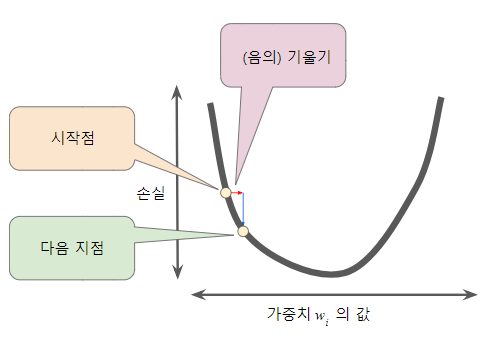

In [13]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = 2*np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)
X_b = np.c_[np.ones((100,1)), X]    # 절편항을 위해 1열에 1값 추가

learning_rate = 0.1   # 학습률 설정
n_iter = 1000           # 반복 횟수 설정
m = 100                 # 샘플 수

theta = np.random.randn(2,1)  # 무작위 초기값 설정

for iter in range(n_iter):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)  # 배치 경사하강법
    theta = theta - learning_rate*gradients          # next step

In [2]:
X_new = np.array([[0],[2]]) 
X_new_b = np.c_[np.ones((2,1)),X_new]
X_new_b.dot(theta)

NameError: name 'np' is not defined

In [17]:

theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

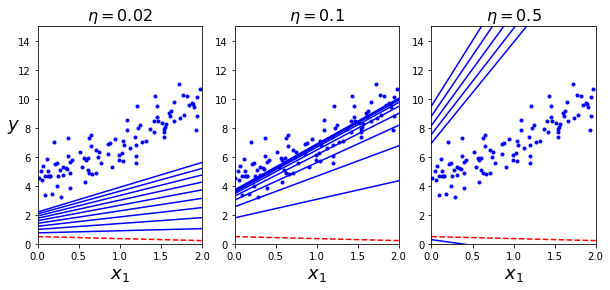

In [18]:
np.random.seed(42)
theta = np.random.randn(2,1)  # 무작위 초기값 설정

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

## 2. 확률적 경사 하강법(Stochastic Gradient Decent)

매 step에서 딱 1개의 sample을 무작위로 선택하고 그에 대한 gradient를 계산한다
* 매 반복에서 적은 데이터를 처리하므로 속도가 매우 빠름
* 1개의 sample에 대한 memory만 필요하므로 매우 큰 훈련 data set도 가능핟다

However, 확률적이기 때문에 훨씬 불안정하고, 매끄러운 하강이 아닌 요동치는 것을 볼 수 있다
* 이렇게 요동치는 것은 역설적으로 지역 최솟값을 뛰어넘어 전역 최솟값을 찾게 도와줄 수 있어, 이 가능성이 배치에 비해 높다

>TIP   
>**학습률을 크게 설정하고(지역 최솟값을 뛰어넘고 수렴하도록), 점차 작게 줄여서 전역 최솟값에 도달하게 하는 것이 좋다**

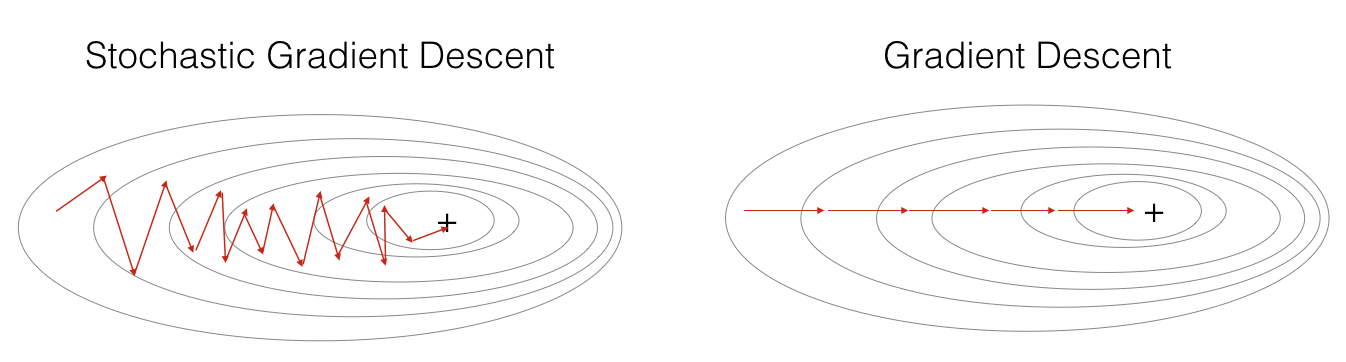

In [19]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

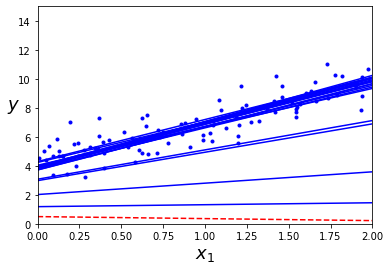

In [20]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 무작위 초기값

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                   
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"      
            plt.plot(X_new, y_predict, style)    
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        learning_rate = learning_schedule(epoch * m + i)
        theta = theta - learning_rate * gradients
        theta_path_sgd.append(theta)             

        
plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)          
plt.ylabel("$y$", rotation=0, fontsize=18)    
plt.axis([0, 2, 0, 15])                        
plt.show()            

>NOTE   
>
>1개의 샘플로 m(샘플 수)번 반복되고, 이때의 각 반복을 *epoch*라고 한다.
>* epoch에 따라 학습률을 변경해가면서 훈련
>* 샘플을 무작위로 선택하므로 어떤 샘플은 한 epoch에서(m번 반복동안) 여러번 선택 될 수도 있고 아에 안쓰일 수도 있다
>
>배치 경사하강법에서 전체 훈련세트를 1000번 반복하는 동안, 이 SGD는 1개의 샘플로 50번만 반복하고도 매우 좋은 값에 도달했다.

## 3. 미니배치 경사하강법(Mini-batch Gradient Descent)

각 스텝에서 전체 훈련세트(like batch)나 하나의 샘플(like SGD)을 기반으로 하지 않고, 미니 배치라고 부르는 임의의 작은 샘플 집합에 대해 계산한다
* 주요 장점은 GPU를 사용해 얻는 성능 향상
* 미니배치를 어느 정도 크게 하면 파라미터 공간에서 SGD보다 덜 불규칙적으로 움직인다
* 미니배치 경사하강법이 SGD보다 최솟값에 더 가까이 도달할 수 있지만 동시에 지역 최솟값에서 빠져나오기는 조금 더 힘들수도 있다(convex가 아닌경우)

In [21]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [22]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

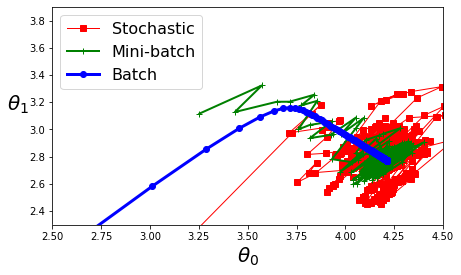

In [23]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

---------------
### 2. Machine Learning에서의 적용

1. 가장 최적의 모형 파라미터를 찾기 위해 Cost Function을 정의한다. 
    * 위의 경우에는 잔차제곱합을을 Cost Function으로 정의했다고 가정하자. 
2. 특정 지점(임의의 파라미터)에서 경사(기울기)를 구한다. 
    * 이 때 미분을 사용한다. 
        + 기울기가 양이라면, 현재 지점(현재 파라미터값)보다 음의 방향으로 움직인다. (경사를 따라 내려간다고 이해하면 되겠다.)

3. 기울기(그레디언트 값)에 학습률(learning rate)를 곱해준다. 
    * learning rate가 크면 학습속도가 빠르지만 이동범위가 넓어 값이 최소로 수렴하지 않을 수 있다.
    * 너무 작으면 이동범위가 너무 좁아 계속 학습을 시켜도 최소값에 가지 못할 수 있다.

In [1]:
import pickle
import pandas as pd

df=pd.read_pickle("./apt_tot.pkl")

In [6]:
df.shape

(5057, 11)

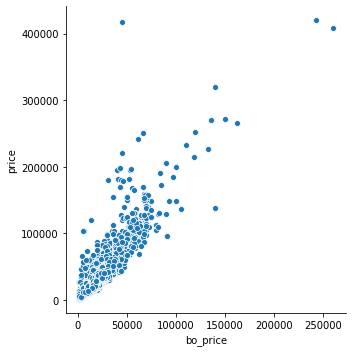

In [3]:
import seaborn as sns

sns.relplot(x="bo_price",y="price",data=df)

In [4]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(df[["bo_price"]], df[["price"]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

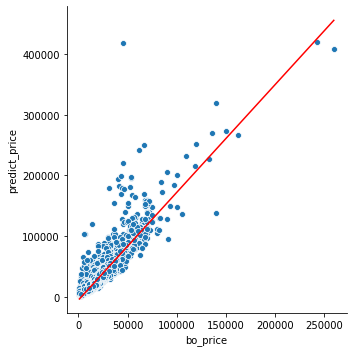

In [5]:
df["predict_price"]=model.predict(df[["bo_price"]])

sns.relplot(x="bo_price", y="price", data=df)
sns.lineplot(x="bo_price", y="predict_price", color='r', data=df)

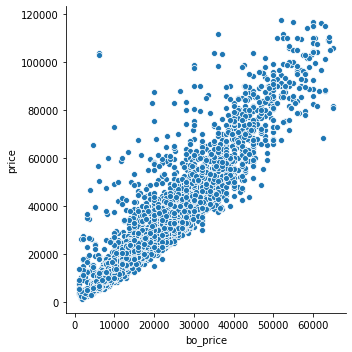

In [24]:
def del_outlier(x):
    from_out = x.mean() - 3 * x.std()
    to_out = x.mean() + 3 * x.std()
    
    x = x[(x>from_out) & (x<to_out)]
    
    return x
 
df["price"] = del_outlier(df["price"])
df["bo_price"] = del_outlier(df["bo_price"])
 
sns.relplot(x="bo_price", y="price", data=df)
 

In [25]:
df = df[(df["price"].isnull() == False) & (df["bo_price"].isnull() == False)]


C:\Users\whbom\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


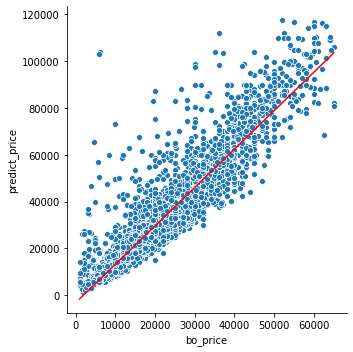

In [26]:
model = LinearRegression()
model.fit(df[["bo_price"]], df[["price"]])

df["predict_price"] = model.predict(df[["bo_price"]])
 
sns.relplot(x= "bo_price", y = "price", data = df)
sns.lineplot(x= "bo_price", y = "predict_price", color="r", data = df)